Élaborer par: Eya kalboussi

L'algorithme: Stochastic Gradient Descent

# La 1ér partie: Collecte et préparation des données



**1. Description de la base de données:**

***Objectif de cette partie: Présentations de la dataset** <br>
[Lien du dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/versions/3?resource=download)


> Le jeu de données "Détection de fraude par carte de crédit" sur Kaggle contient des transactions de carte de crédit anonymisées effectuées par des titulaires de carte européens en septembre 2013.<br>
 Le jeu de données contient un total de 284 807 transactions, dont 492 sont des fraudes. Le jeu de données contient les variables suivantes :<br>
**Temps* : Nombre de secondes écoulées entre cette transaction et la première transaction de l'ensemble de données <br>
**V1, V2, ..., V28* : Variables d'entrée anonymisées pour des raisons de confidentialité <br>
**Montant* : Montant de la transaction <br>
**La variable cible:** ClassE prend la valeur 1 en cas de fraude et 0 sinon.
<br>

**L'objectif de ce jeu de données** : est de construire un modèle de détection de fraude qui peut identifier les transactions frauduleuses en utilisant les informations disponibles dans les variables d'entrée anonymisées.<br>
* Il s'agit donc d'un jeu de données très déséquilibré, où les fraudes représentent moins de 0,2% des transactions. <br>
Ce jeu de données contient uniquement des variables d'entrée numériques qui résultent d'une transformation PCA (Analyse en Composantes Principales). Malheureusement, en raison de problèmes de confidentialité, nous ne pouvons pas fournir les caractéristiques d'origine et plus d'informations sur les données. Les variables V1, V2, ..., V28 sont les composantes principales obtenues avec PCA.  <br>
* Les seules caractéristiques qui n'ont pas été transformées avec PCA sont 'Time' (temps) et 'Amount' (montant). La variable 'Time' contient les secondes écoulées entre chaque transaction et la première transaction de l'ensemble de données. La variable 'Amount' est le montant de la transaction. <br>







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

**1.Charger les données:**

In [ ]:
# importer Le jeu de données "Détection de fraude par carte de crédit"
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Ter partie2 /archive.zip')

In [ ]:
# Afficher la base données:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**2.Afficher des informations sur dataset**

In [ ]:
#Afficher des informations sur dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

 **=>** On peut voir que :

* L'ensemble de données contient 284807 échantillons et 30 caractéristiques
* Toutes les caractéristiques sont numériques et codées en nombres flottants.

**4.Vérification s'il existe des valeurs manquantes**

In [ ]:
# check for null values
df.isnull().shape[0]
print("Non-missing values: " + str(df.isnull().shape[0]))
print("Missing values: " + str(df.shape[0] - df.isnull().shape[0]))

Non-missing values: 284807
Missing values: 0


# 2 éme partie: Analyse exploratoire  et visualisation des données

**1.les statistiques descriptives pour chaque variable**

In [ ]:
# Afficher les statistiques descriptives pour chaque variable
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


=> Pour chacune de ces caractéristiques, si l'on compare les valeurs maximales et les valeurs de 75 % des données, on constate une énorme différence. Cela confirme que il y a des valeurs aberrantes dans les données.
Ces valeurs extrêmes peuvent avoir un impact important sur les analyses statistiques et peuvent fausser les résultats <br>

**2.matrice de corrélation**

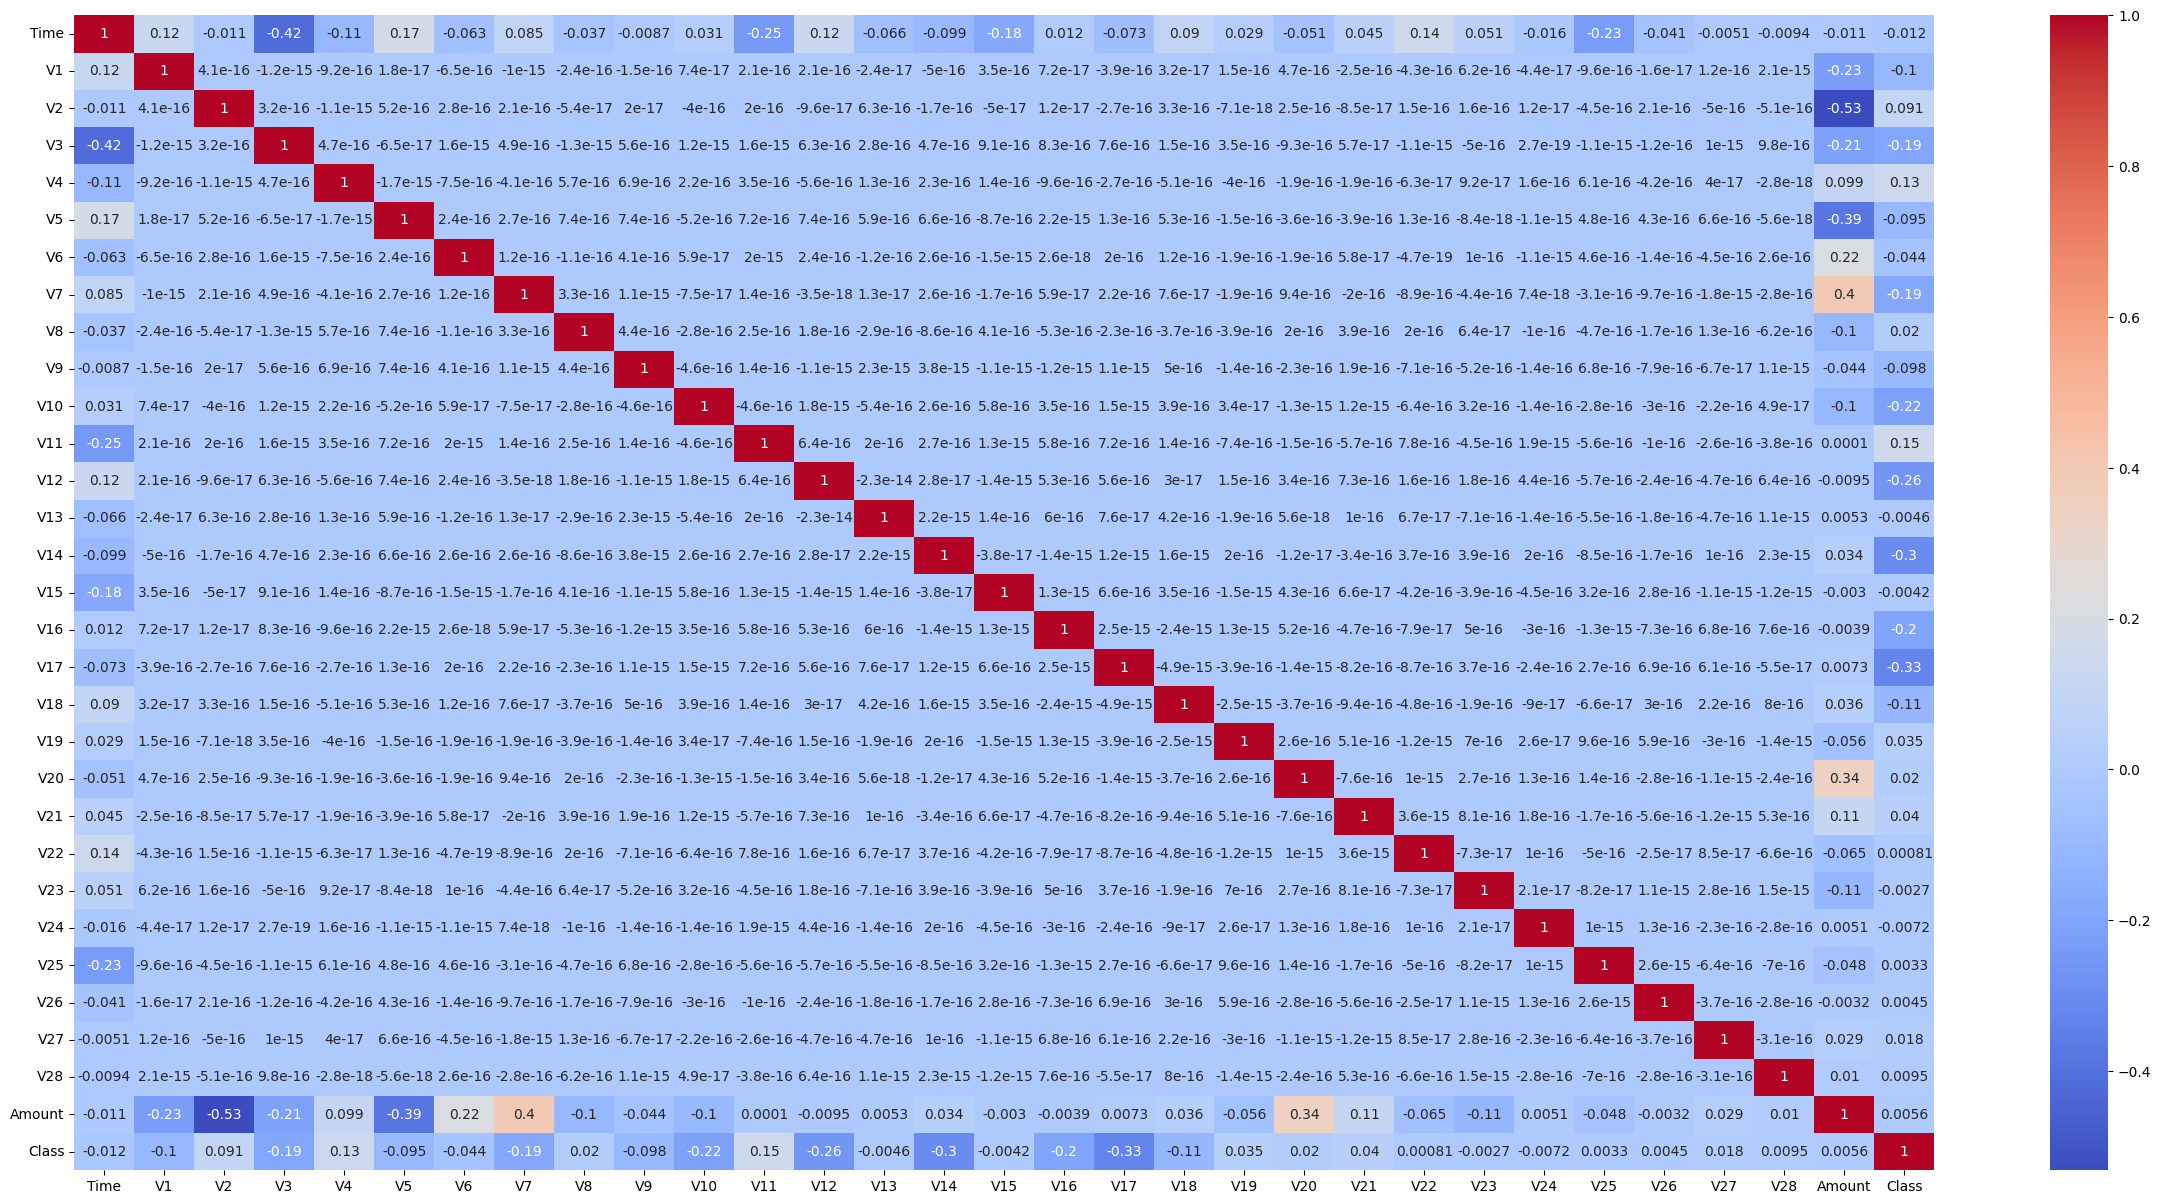

In [ ]:
# Visualiser les corrélations entre les variables à l'aide d'une matrice de corrélation
corr_matrix = df.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



===>  D'aprés La matrice de corrélation, il y'a pas une relation de causalité entres les variables car les valeurs sont faibles et les couleurs claires indiquent une faible corrélation. <br>


 **3.Diagramme circulaire:**
Pour connaître la proportion relative de transactions par carte de crédit valides et frauduleuses

Fraudulent Cases: 492
Valid Transactions: 284315
Proportion of Fraudulent Cases: 0.001727485630620034


<Axes: ylabel=' '>

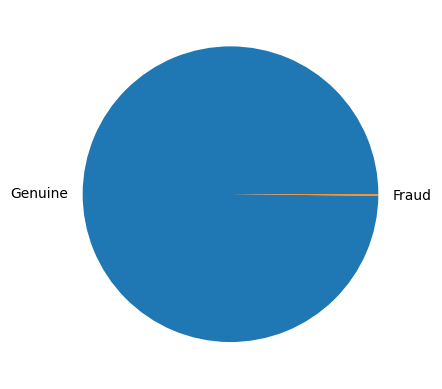

In [ ]:
# Vérification de la proportion relative
print("Fraudulent Cases: " + str(len(df[df["Class"] == 1])))
print("Valid Transactions: " + str(len(df[df["Class"] == 0])))
print("Proportion of Fraudulent Cases: " + str(len(df[df["Class"] == 1])/ df.shape[0]))

# Pour voir à quel point le nombre de transactions frauduleuses est faible
data_p = df.copy()
data_p[" "] = np.where(data_p["Class"] == 1 ,  "Fraud", "Genuine")

# tracer un diagramme circulaire
data_p[" "].value_counts().plot(kind="pie")

Il y a un déséquilibre dans les données, avec seulement 0,17 % du total des cas frauduleux.

**la proportion relative de transactions par carte de crédit valides et frauduleuses**

In [ ]:
print("Average Amount in a Fraudulent Transaction: " + str(df[df["Class"] == 1]["Amount"].mean()))
print("Average Amount in a Valid Transaction: " + str(df[df["Class"] == 0]["Amount"].mean()))

Average Amount in a Fraudulent Transaction: 122.21132113821139
Average Amount in a Valid Transaction: 88.29102242231328


====> la transaction monétaire moyenne pour les fraudeurs est supérieure Cela rend un problème.<br>
Par la suite, on va essayer de comprendre la distribution de la colonne "Amount"

les statistiques descriptives pour chaque variable "Amount"

In [ ]:
print("Summary of the feature - Amount" + "\n-------------------------------")
print(df["Amount"].describe())

Summary of the feature - Amount
-------------------------------
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


====> On voit que il y une grande difference entre 75% =77.165000 et max= 25691.160000

**5.Transforamation (power transformation) pour le montant:**

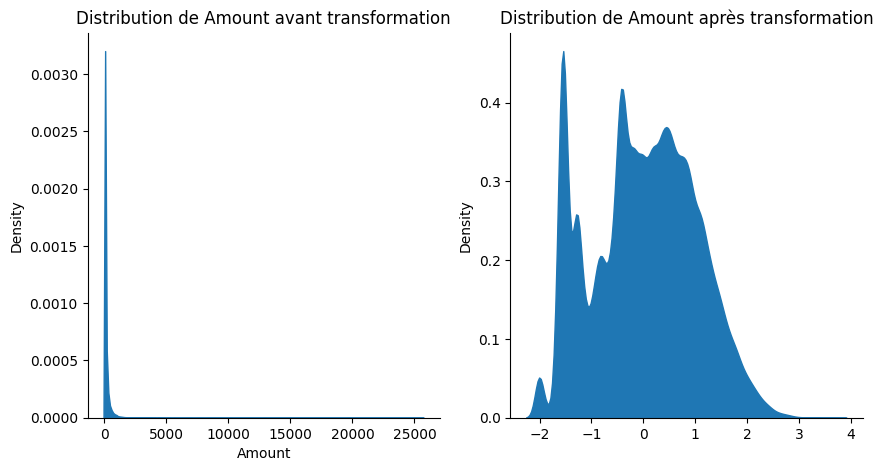

In [ ]:
from sklearn.preprocessing import power_transform
# Appliquer la transformation de puissance à la variable "Amount"
df["Amount_transformed"] = power_transform(df[["Amount"]])

# Créer les graphiques de la distribution de la variable "Amount" avant et après la transformation
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(x=df["Amount"], fill=True, alpha=1, ax=axes[0])
sns.kdeplot(x=df["Amount_transformed"].ravel(), fill=True, alpha=1, ax=axes[1])
axes[0].set_title('Distribution de Amount avant transformation')
axes[1].set_title('Distribution de Amount après transformation')
sns.despine()
plt.show()


=====> La transformation des données  est utilisée dans l'analyse de données pour modifier la distribution des données d'une variable, afin d'améliorer la qualité des résultats des analyses statistiques. Cette transformation de la colonne "Amount" est utile car les données ne suivent pas une distribution normale.

**4.Pairplot**

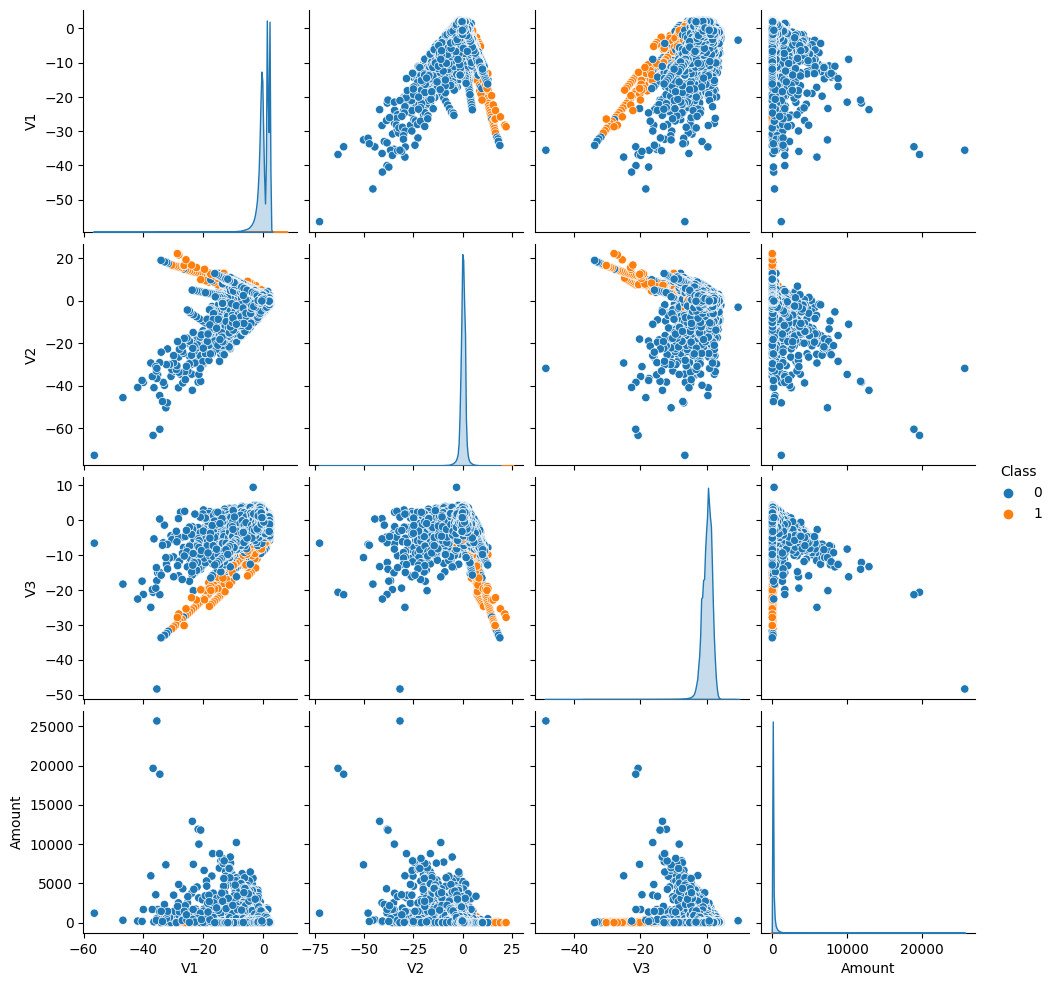

In [ ]:
# Visualiser les relations entre certaines variables à l'aide de diagrammes de dispersion
sns.pairplot(df[['V1', 'V2', 'V3', 'Amount', 'Class']], hue='Class')
plt.show()

===>  Un diagramme de dispersion est un graphique qui représente la relation entre deux variables numériques. Les valeurs aberrantes dans un diagramme de dispersion peuvent être identifiées comme des points qui se trouvent très loin de la tendance générale des données et qui ont une influence disproportionnée sur la corrélation entre les deux variables.comme les graphes du Amount et V1 ; V2 et Amount ;  V1 et Amount. <br>

**6.Scatterplot**

<Axes: xlabel='Amount', ylabel='V1'>

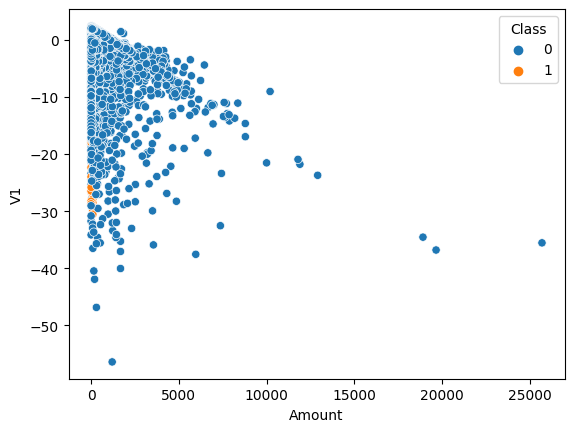

In [ ]:
sns.scatterplot(x="Amount", y="V1",hue="Class",data=df)

D'aprés de scoterplot on voit que les points sont regroupés étroitement dans une région spécifique du graphique, cela peut indiquer une forte corrélation entre les deux variables et  la valeur est proche de -1, cela indique une forte corrélation négative. Cela signifie que lorsque la valeur d'une variable augmente, la valeur de l'autre variable diminue et vice versa.


**7.countplot**

In [ ]:
def get_fig_and_axes_list(plot_count, column_number=2):
    """
    This function takes in the number of subplots to be plotted and the desired number of columns for the subplot grid.
    It then calculates the number of rows required and generates a matplotlib figure with the given number of subplots
    in a grid with the desired number of columns.

    Args:
    - plot_count: int, the number of subplots to be plotted
    - column_number: int, the number of columns in the subplot grid. Default value is 2.

    Returns:
    - fig: matplotlib Figure object, the generated figure
    - axes_list: list of matplotlib Axes objects, the axes of the subplots in the figure
    """
    reminder_num = plot_count % column_number
    row_num = (plot_count // column_number) + (reminder_num > 0)
    axes_list = []
    row_number_alignment = np.ones((row_num, column_number), dtype="int")
    if reminder_num != 0:
        row_number_alignment[-1,-(column_number - reminder_num):] = 0
    coefficient = (3.5 if plot_count==1 else 4.2)
    col_size = coefficient*column_number
    row_size = coefficient*row_num
    fig = plt.figure(figsize=(col_size, row_size), layout="constrained")
    spec = fig.add_gridspec(row_num, column_number)
    for i in range(row_num):
        for j in range(column_number):
            if row_number_alignment[i,j] == 1:
                ax = fig.add_subplot(spec[i,j])
                axes_list.append(ax)
    return fig,axes_list





NameError: ignored

NameError: ignored

**Conclusion:** <br>
* L'ensemble de données comporte 32 colonnes avec des caractéristiques inconnues étiquetées de V1 à V28, Temps, Montant et Classe. <br>
*La variable cible est "Classe" et les autres variables sont des caractéristiques d'entrée. <br>
*La classe a les valeurs suivantes
        0 : Transactions légitimes
        1 : Transactions frauduleuses
L'ensemble de données est fortement déséquilibré, comme le montre le graphique de comptage avec l'étiquette de classe majoritaire "0" et l'étiquette de classe minoritaire "1. <br>
Par conséquent, si nous exécutons le modèle sur des données aussi déséquilibrées, nous risquons de le surajuster et d'obtenir un modèle non déployable.<br>
***====>** C'est pourquoi nous effectuerons un suréchantillonnage synthétique des minorités sur les données afin de les équilibrer



# 3 éme partie: Nettoyage des données


**1.Équilibrer les classes est le suréchantillonnage avec SMOTE:**
Il utilise la technique de suréchantillonnage SMOTE pour équilibrer les classes du dataset. Le code charge le dataset dans un dataframe, affiche la répartition des classes, sépare les données en features et target, applique la technique de suréchantillonnage SMOTE, affiche la répartition des classes dans le nouveau dataset équilibré, concatène les features et la target pour créer un nouveau dataframe, et enregistre le nouveau dataframe dans un fichier CSV.

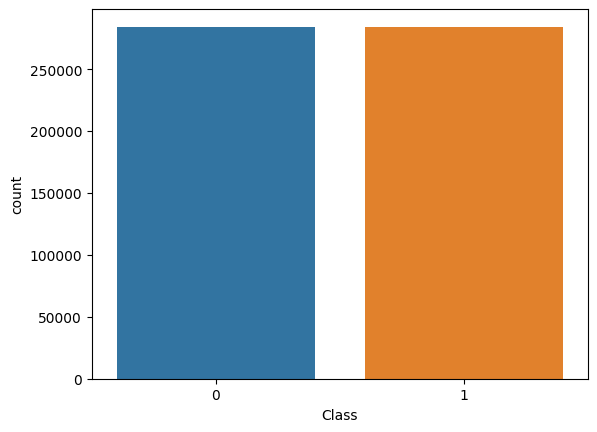

In [ ]:
from imblearn.over_sampling import SMOTE
# Afficher la répartition des classes
sns.countplot(x='Class', data=df)

# Séparer les données en features et target
X = df.drop('Class', axis=1)
y = df['Class']

# Appliquer la technique de suréchantillonnage SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Afficher la répartition des classes après l'application de SMOTE
sns.countplot(x=y_res)

# Concaténer les features et la target pour créer un nouveau dataframe
df_resampled = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
df_resampled.columns = df.columns

# Enregistrer le nouveau dataframe dans un fichier CSV
df_resampled.to_csv("df-nouveau", index=False)

In [ ]:
df_resampled


In [ ]:
df_eq = df_resampled

Par conséquent, on a résolu le déséquilibre de classe .

**2. Détection de valeurs aberrantes:**
Les valeurs aberrantes peuvent affecter négativement les résultats d'une analyse statistique et fausser les conclusions et leur suppression peut améliorer la qualité des données.


**A. Identifier les valeurs aberrantes pour chaque colonne numérique:**

In [ ]:
# Définir la taille de la figure
plt.figure(figsize=(15,5))
# Créer un graphique de boîte à moustaches pour chaque colonne numérique
sns.boxplot(data=df.select_dtypes(include=['float64']))
plt.show()
# Identifier les valeurs aberrantes pour chaque colonne numérique
for col in df.select_dtypes(include=['float64']):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Colonnes {col} : {len(outliers)} valeurs aberrantes')

**====>**D'apres le boxplot, on voit que dans toutes les colonnes il y'a des valeurs aberantes sauf dans la colonne "Time".

**B.Supprimer les valeurs aberrantes**

In [ ]:
# Calculer les limites inférieure et supérieure à partir des quantiles
q1 = df_eq.quantile(0.25)
q3 = df_eq.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identifier les valeurs aberrantes
outliers = ((df_eq < lower_bound) | (df_eq > upper_bound)).any(axis=1)

# Supprimer les lignes contenant des valeurs aberrantes
df_eq_clean = df_eq.drop(df_eq.index[outliers])

# Vérifier que toutes les valeurs aberrantes ont été supprimées
print("Nombre de valeurs aberrantes supprimées :", outliers.sum())
print("Taille du dataset après suppression :", df_eq_clean.shape)


**3. Afficher de nouveau les statistiques descriptives pour chaque variable:**

In [ ]:
df_eq_clean.describe()

**Conclusion:** <br>
L'analyse du Calculs des statistiques descriptives et le boxplot montre que le nombre de valeurs aberrantes supprimées : 253572 et la
taille du dataset après suppression : (315058, 31)
. <br>
En comparant le "75%" et "max". on trouve pas une grande difference comme au début. <br>
=====> Cela signifie que on a pas des valeurs aberrantes dans notre dataset.

# 5 éme partie : Diviser les données en ensemble d'entraînement et ensemble de test et l'entrainement du modéle

**1.Problème de classification binaire** <br>
La classification binaire est un type de problème de classification qui consiste à classer les exemples d'un ensemble de données en deux catégories distinctes

**2.choix de la méthode d'optimisation pour entraîner le modéle:** <br>
> **La descente de gradient stochastique**  <br>
(SGD) est un algorithme d'optimisation couramment utilisé dans l'apprentissage automatique pour former des modèles. Il s'agit d'une variante de la descente de gradient qui met à jour les paramètres du modèle sur un petit sous-ensemble des données d'apprentissage à la fois, plutôt que sur l'ensemble des données. <br>
<br>

**3.Choix des métriques d'évaluation:**

 > ***L'accuracy** (exactitude en français) est la mesure globale de la précision du modèle, c'est-à-dire le nombre de prédictions correctes divisé par le nombre total de prédictions. <br>
 ***La precision** (précision en français) est la proportion de prédictions positives correctes parmi toutes les prédictions positives. Cela signifie que la précision mesure la capacité du modèle à prédire correctement les transactions frauduleuses. <br>
***Le score F1** est la moyenne harmonique de la précision et du rappel, et il est donc une mesure qui prend en compte les deux mesures de performance. F1 = 2 * (precision * recall) / (precision + recall) <br>
 ***La matrice de confusion** est une représentation tabulaire de la performance d'un modèle de classification, qui montre les prédictions correctes et incorrectes pour chaque classe prédite.<br>
 Elle contient quatre éléments : les vrais positifs, les faux positifs, les vrais négatifs et les faux négatifs. Les vrais positifs sont les cas où le modèle a correctement identifié une observation positive, les faux positifs sont les cas où le modèle a identifié à tort une observation négative comme positive, les vrais négatifs sont les cas où le modèle a correctement identifié une observation négative et les faux négatifs sont les cas où le modèle a identifié à tort une observation positive comme négative.



In [ ]:
# Chargement et préparation des données
X = df_eq_clean.iloc[:, :-1].values
y = df_eq_clean.iloc[:, -1].astype(int).values # conversion en entiers
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardisation des données
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Création du modèle avec SGD optimization
sgd_clf = SGDClassifier(loss='log', random_state=42)

# Entrainement du classifieur avec stochastic gradient descent
sgd_clf.fit(X_train, y_train)

# Evaluation du classifieur sur le test set
y_pred = sgd_clf.predict(X_test)

# Affichage des résultats
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("Score de précision:", precision_score(y_test, y_pred, average='micro'))
print("Score de rappel:", recall_score(y_test, y_pred, average='micro'))
print("Score F1:", f1_score(y_test, y_pred, average='micro'))


**Entrainement du modéle:** <br>

*Nous fixons 30 % pour le test et 70 % pour l'entraînement.En fixant le paramètre "random_state" à une valeur fixe, par exemple random_state=42, pour assurer la même division aléatoire est générée à chaque fois que nous exécutons le code.<br>

Le modéle est entrainé par algorithme d'apprentissage automatique appelé SGDClassifier, en utilisant une fonction de perte de type logistique(une fonction mathématique qui mesure l'erreur entre les prédictions d'un modèle et les valeurs réelles de l'ensemble de données)

**Interpretation du modéle:** <br>


> * Le modèle a prédit correctement 62019 exemples de la classe négative et 30631 exemples de la classe positive. Cependant, il a fait des erreurs en prédisant 1529 exemples de la classe positive comme négative (faux négatifs) et 339 exemples de la classe négative comme positive (faux positifs). <br>
* Le score de précision est de 0,98, ce qui signifie que 98% des exemples prédits comme positifs sont réellement positifs. <br>
* Le score de rappel est également de 0,98, ce qui signifie que 98% des exemples de la classe positive ont été correctement identifiés par le modèle. <br>
* Le score F1 est de 0,98 est élevé indique un équilibre entre la précision et le rappel et  il est donc considéré comme une mesure globale de la performance du modèle.

=====> Ces résultats suggèrent que le modèle est performant et peut être utilisé pour prédire avec précision la classe de nouveaux exemples.




**Conclusion:**
Les valeurs de précision et de rappel sont excellentes, mais cela ne signifie pas nécessairement que le modèle est optimisé pour les hyperparamètres utilisés. Il est possible que d'autres combinaisons d'hyperparamètres puissent encore améliorer la performance du modèle.

# 6 éme partie: Ajustemenet des hyperparamètres:
Quelques hyperparamètres importants pour le modèle de classification SGDClassifier :
>* loss : La fonction de perte utilisée pour l'optimisation. Les options les plus courantes sont "hinge" pour une SVM linéaire, "log" pour la régression logistique, "modified_huber" pour une perte douce et "perceptron" pour la perte du perceptron.
* alpha : Paramètre de régularisation. Plus la valeur d'alpha est élevée, plus la régularisation est forte.
* penalty : La norme de régularisation à appliquer, l1 ou l2.
* learning_rate : Le taux d'apprentissage pour la mise à jour des poids. Les options sont "constant" pour un taux d'apprentissage constant, "optimal" pour un taux d'apprentissage adaptatif basé sur l'inverse du temps de décroissance et "invscaling" pour un taux d'apprentissage qui diminue progressivement.
* max_iter : Le nombre maximum d'itérations pour l'optimisation.
* tol : La tolérance pour la convergence.
* eta0 : Le taux d'apprentissage initial pour les méthodes "constant" et "invscaling".

**La grille de recherche** (Grid Search) est une technique de recherche d'hyperparamètres pour un modèle d'apprentissage automatique. Elle consiste à définir une grille de combinaisons d'hyperparamètres et à tester chacune de ces combinaisons sur le jeu de données. Les performances du modèle sont évaluées à chaque fois et la combinaison d'hyperparamètres avec les meilleures performances est sélectionnée comme étant la meilleure.

In [ ]:
# Créer un pipeline pour standardiser les données et entraîner le classificateur SGD
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier())
])

# Définir la grille des hyperparamètres à tester
param_grid = {
    'sgd__loss': ['hinge', 'log'],
    'sgd__alpha': [0.0001, 0.001, 0.01],
    'sgd__penalty': ['l1', 'l2', 'elasticnet'],
    'sgd__max_iter': [1000, 5000, 10000],
}

# Créer un objet GridSearchCV pour tester les hyperparamètres
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='f1')

# Entraîner le modèle avec la recherche en grille des hyperparamètres
grid.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres:", grid.best_params_)

# Évaluer le modèle avec les hyperparamètres optimaux sur l'ensemble de test
y_pred = grid.predict(X_test)

print("Score de précision:", precision_score(y_test, y_pred))
print("Score de rappel:", recall_score(y_test, y_pred))
print("Score F1:", f1_score(y_test, y_pred))



**Interpretation:**
* la meilleurs combinaison des hyperparamètres: sgd__alpha': 0.0001, 'sgd__loss': 'hinge', 'sgd__max_iter': 10000, 'sgd__penalty': 'l1'. <br>

* Après avoir effectué l'ajustement des hyperparamètres, le modèle a été amélioré avec une augmentation significative du score de précision à 0,991 et une légère diminution du score de rappel à 0,965 par rapport aux scores initiaux de 0,980 pour les deux métriques. <br>


# Conlusion:

* Le modèle est maintenant plus précis et plus robuste dans sa capacité à détecter les transactions frauduleuses.

* Cela peut avoir un impact important sur la détection de fraude par carte de crédit, car un modèle plus précis signifie moins de transactions frauduleuses qui passent inaperçues et plus de transactions légitimes qui sont approuvées. Cela peut aider à réduire les pertes financières pour les institutions financières et les consommateurs.

* En conclusion, l'ajustement des hyperparamètres est une étape importante dans le développement d'un modèle de détection de fraude par carte de crédit efficace, et peut conduire à une amélioration significative de la précision et de la robustesse du modèle.
